In [2]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime


# Pulling in the file
df = pd.read_csv("Resources/Reduced Data.csv")
df.head()

,Unnamed: 0,Incident Number,Highest Offense Description,Occurred Date,Occurred Time,Address,Zip Code,APD District,Clearance Date
0,0,202221104,DEPENDENT AND NEGLECTED CHILD,01/02/2022,1956,00 BLOCK IH 35 SVRD NB / E BRAKER LN,78753.0,7,01/03/2022
1,1,202221365,FAMILY DISTURBANCE,01/02/2022,2228,10500 S IH 35 SVRD SB,78748.0,2,01/03/2023
2,2,20228000169,BURGLARY OF VEH-NO SUSPECT/FU,12/26/2021,100,7312 VIA CORRETO DR,78749.0,6,01/11/2022
3,3,202221283,THEFT CATALYTIC CONVERTER,12/29/2021,537,3600 PRESIDENTIAL BLVD,78719.0,S,03/28/2022
4,4,20225000099,BURGLARY OF VEHICLE,12/25/2021,545,11608 SPICEWOOD PKWY,78750.0,8,01/03/2022


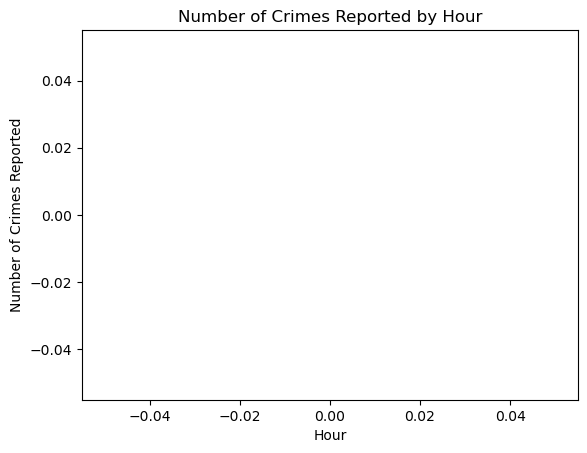

In [2]:
#looking at the how many crimes happen throughout the day for each hour(24hr)
df['Occurred Date'] = pd.to_datetime(df['Occurred Date'])
monthly_counts = df.groupby(df['Occurred Date'].dt.month)['Incident Number'].count()

df['Occurred Time'] = df['Occurred Time'].astype(str)

# fixing the time so that we can graph properly 
df['Hour'] = df['Occurred Time'].apply(lambda x: re.findall(r'(\d{1,2}):', x)[0] if re.findall(r'(\d{1,2}):', x) else '')
df['Minute'] = df['Occurred Time'].apply(lambda x: re.findall(r':(\d{1,2})', x)[0] if re.findall(r':(\d{1,2})', x) else '')
 
df['Occurred Time'] = pd.to_datetime(df['Hour'] + ':' + df['Minute'], format='%H:%M', errors='coerce')
df = df.drop(['Hour', 'Minute'], axis=1)


time_count = df.groupby(df['Occurred Time'].dt.hour)['Incident Number'].count()

#ploting the scatter plot graph
plt.scatter(time_count.index, time_count.values)
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Reported')
plt.title('Number of Crimes Reported by Hour')
plt.show()


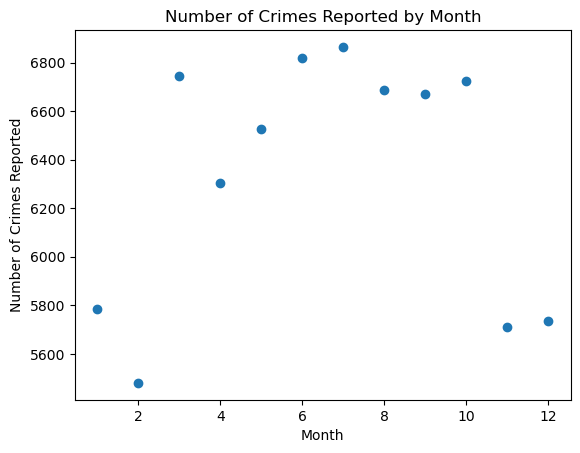

In [3]:
#looking at the number of crimes that happen each month for all of 2022
df['Occurred Date'] = pd.to_datetime(df['Occurred Date'])
monthly_counts = df.groupby(df['Occurred Date'].dt.month)['Incident Number'].count()

#ploting the scatter plot graph
plt.scatter(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Crimes Reported')
plt.title('Number of Crimes Reported by Month')
plt.show()


In [ ]:
# Analysis 
# Question 1: Seeing if there is a trend of when crimes are being reported during the day, and then throughout the year.

# Using the data set of Austin Crime reports in 2022. We focused on the data in the columns of Occurred Time and Occurred Date.
# For the first part of the question, we looked at the data for Occurred Time. Which represents the time of when a crime is being reported. We wanted to see if there was a trend of when crimes are being reported. 
# We can see a trend of when crime reports are being made. The number of reports peaks early in the day, 1:00-3:00 am and then again late in the afternoon, 5:00-6:00 pm.
 
# Which if we think about human patterns. It makes sense that crimes are happening in the middle of the night. When the number of people witnessing a crime decreases, it may be easier to commit a crime in the dark versus in broad daylight. When we think about the peak of reports around 5pm, crimes may have happened throughout the day, but around 5pm is when people usually get off of work/school. So that is when they realize a crime is happening and are able to report. 

# For the second part of the question, we looked at the data for Occurred Date. Which represents the day of which a report was created. Similarly to looking at the trend for reports throughout the day, we wanted to see what the trend for reports was like for the year. 
# Based on the data we can see that the reports are peaking in the middle of the year. This shocked us, you always hear about crime spiking over the holidays. But according to this dataset the exact opposite happened. Crime between November and February has significantly lower crime numbers compared to the months in the middle of the year. 
# Our biggest limitation with this data set was the size of the data set, and how some of the information may not be the most accurate. Such as the exact time of when crimes took place. We had to really clean up our data set so we can effectively look at the data, create a graph that is legible and draw a conclusion and analysis from. 




